<a href="https://colab.research.google.com/github/sisomimoctrl/asset-allocation/blob/main/60_40_spy_ief_strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install bt yfinance quantstats

In [2]:
import bt
import yfinance as yf
import pandas as pd
import quantstats as qs
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
tickers = ['spy', 'ief']
df = yf.download(tickers, start='2003-1-1', end='2022-4-30')['Adj Close']

df.info()

[*********************100%***********************]  2 of 2 completed
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4867 entries, 2002-12-31 to 2022-04-29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   IEF     4866 non-null   float64
 1   SPY     4866 non-null   float64
dtypes: float64(2)
memory usage: 114.1 KB


In [4]:
for c in df.columns:
    print(c, df[c].first_valid_index(), ',', df[c].last_valid_index())

IEF 2003-01-02 00:00:00 , 2022-04-29 00:00:00
SPY 2003-01-02 00:00:00 , 2022-04-29 00:00:00


In [5]:
start = '2003-1-1'
end = '2022-4-30'

data = df[start:].copy()

In [6]:
print(data.corr())
print(data.resample('M').last().corr())

          IEF       SPY
IEF  1.000000  0.837259
SPY  0.837259  1.000000
          IEF       SPY
IEF  1.000000  0.836722
SPY  0.836722  1.000000


In [7]:
def long_only_ew(name, data, tickers, initial_capital=100000000.0):
    s = bt.Strategy(
        name, 
        [bt.algos.RunOnce(),
         bt.algos.SelectThese(tickers),
         bt.algos.WeighEqually(),
         bt.algos.Rebalance()])
    t = bt.Backtest(s, data, initial_capital=initial_capital)
    return t 

def strategy_6040(name, data, tickers, weights, initial_capital=100000000.0):
    s = bt.Strategy(        
        name, 
        [bt.algos.RunYearly(
            run_on_first_date=True, 
            run_on_end_of_period=True, 
            run_on_last_date=True),
         bt.algos.SelectThese(tickers),
         bt.algos.WeighSpecified(**weights),
         bt.algos.PrintDate(),
         bt.algos.PrintTempData(),
         bt.algos.Rebalance()])
    t = bt.Backtest(s, data, initial_capital=initial_capital)
    return t

bt_spy = long_only_ew('SPY', data, ['SPY'])
bt_6040 = strategy_6040('60_40', data, ['SPY', 'IEF'], {'SPY':0.6, 'IEF':0.4})

res = bt.run(bt_6040, bt_spy)

2003-01-02 00:00:00
{'selected': ['SPY', 'IEF'], 'weights': {'SPY': 0.6, 'IEF': 0.4}}
2003-12-31 00:00:00
{'selected': ['SPY', 'IEF'], 'weights': {'SPY': 0.6, 'IEF': 0.4}}
2004-12-31 00:00:00
{'selected': ['SPY', 'IEF'], 'weights': {'SPY': 0.6, 'IEF': 0.4}}
2005-12-30 00:00:00
{'selected': ['SPY', 'IEF'], 'weights': {'SPY': 0.6, 'IEF': 0.4}}
2006-12-29 00:00:00
{'selected': ['SPY', 'IEF'], 'weights': {'SPY': 0.6, 'IEF': 0.4}}
2007-12-31 00:00:00
{'selected': ['SPY', 'IEF'], 'weights': {'SPY': 0.6, 'IEF': 0.4}}
2008-12-31 00:00:00
{'selected': ['SPY', 'IEF'], 'weights': {'SPY': 0.6, 'IEF': 0.4}}
2009-12-31 00:00:00
{'selected': ['SPY', 'IEF'], 'weights': {'SPY': 0.6, 'IEF': 0.4}}
2010-12-31 00:00:00
{'selected': ['SPY', 'IEF'], 'weights': {'SPY': 0.6, 'IEF': 0.4}}
2011-12-30 00:00:00
{'selected': ['SPY', 'IEF'], 'weights': {'SPY': 0.6, 'IEF': 0.4}}
2012-12-31 00:00:00
{'selected': ['SPY', 'IEF'], 'weights': {'SPY': 0.6, 'IEF': 0.4}}
2013-12-31 00:00:00
{'selected': ['SPY', 'IEF'], 'weig

In [8]:
res.display()

Stat                 60_40       SPY
-------------------  ----------  ----------
Start                2003-01-01  2003-01-01
End                  2022-04-29  2022-04-29
Risk-free rate       0.00%       0.00%

Total Return         359.51%     555.43%
Daily Sharpe         0.85        0.61
Daily Sortino        1.33        0.95
CAGR                 8.21%       10.22%
Max Drawdown         -29.76%     -55.19%
Calmar Ratio         0.28        0.19

MTD                  -6.98%      -8.78%
3m                   -7.27%      -6.49%
6m                   -9.56%      -9.69%
YTD                  -11.92%     -12.99%
1Y                   -3.40%      -0.63%
3Y (ann.)            8.63%       13.77%
5Y (ann.)            8.70%       13.52%
10Y (ann.)           8.92%       13.55%
Since Incep. (ann.)  8.21%       10.22%

Daily Sharpe         0.85        0.61
Daily Sortino        1.33        0.95
Daily Mean (ann.)    8.39%       11.52%
Daily Vol (ann.)     9.92%       18.87%
Daily Skew           -0.23       -0.

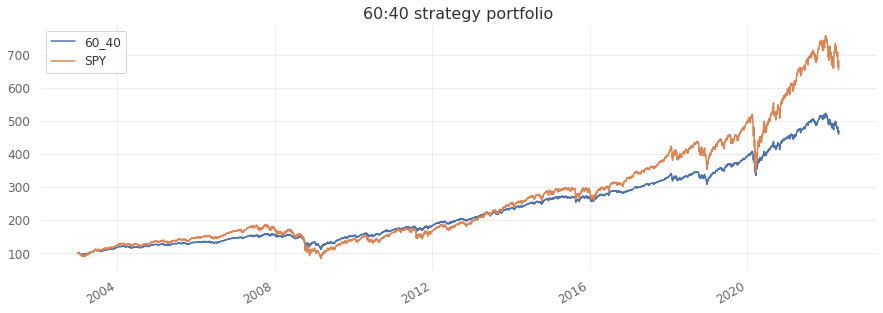

In [9]:
res.plot()
plt.title('60:40 strategy portfolio', fontsize=16)
plt.legend(ncol=1)
plt.show()

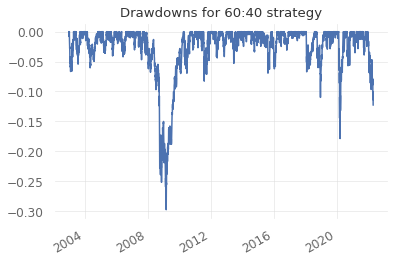

In [10]:
res.backtests['60_40'].stats.drawdown[:].plot()
plt.title('Drawdowns for 60:40 strategy')
plt.show()

In [11]:
res.display_monthly_returns()

  Year    Jan    Feb    Mar    Apr    May    Jun    Jul    Aug    Sep    Oct    Nov    Dec     YTD
------  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  ------
  2003  -2.97   0.13  -0.04   4.94   4.8    0.36  -0.89   1.55   1.19   2.69   0.69   3.92   17.31
  2004   1.59   1.46  -0.28  -2.89   0.82   1.38  -1.49   1.28   0.73   1.17   1.85   2.29    8.07
  2005  -1      0.68  -1.26  -0.11   2.65   0.29   1.36   0.23  -0.23  -1.92   2.89   0.42    3.95
  2006   1.16   0.31   0.47   0.54  -1.91   0.25   0.92   2.02   2.12   2.15   1.73   0.35   10.51
  2007   0.74  -0.37   0.63   2.89   1.51  -1.08  -1.06   1.67   2.36   1.25  -0.79  -0.64    7.24
  2008  -2.29  -0.97   0.07   1.62   0.13  -4.44  -0.19   1.54  -5.33  -9.24   0.51   3.25  -14.91
  2009  -6.48  -6.63   6.14   4.54   2.71  -0.25   4.97   2.63   2.69  -1.3    4.7   -0.26   13.17
  2010  -1.23   1.96   3.17   1.59  -3.69  -1.73   4.23  -1.16   4.98   2.2   -0.37   2.52   12.78
  2011   1

In [12]:
res.backtests['60_40'].stats.drawdown_details.sort_values(by='drawdown', ascending=True).head(5)

,Start,End,Length,drawdown
88,2007-10-10 00:00:00,2010-04-13 00:00:00,916,-0.297621
305,2020-02-20 00:00:00,2020-06-08 00:00:00,109,-0.178684
348,2021-12-28 00:00:00,2022-04-29 00:00:00,122,-0.122994
272,2018-09-21 00:00:00,2019-03-13 00:00:00,173,-0.109875
109,2011-07-25 00:00:00,2011-11-08 00:00:00,106,-0.082682


In [13]:
res.backtests['60_40'].stats.drawdown_details.sort_values(by='Length', ascending=False).head(5)

,Start,End,Length,drawdown
88,2007-10-10 00:00:00,2010-04-13 00:00:00,916,-0.297621
32,2004-03-08 00:00:00,2004-11-03 00:00:00,240,-0.06046
213,2015-04-27 00:00:00,2015-12-01 00:00:00,218,-0.069308
268,2018-01-29 00:00:00,2018-08-17 00:00:00,200,-0.06713
272,2018-09-21 00:00:00,2019-03-13 00:00:00,173,-0.109875
